In [1]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 14.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load Excel file
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
# df

## Visualization

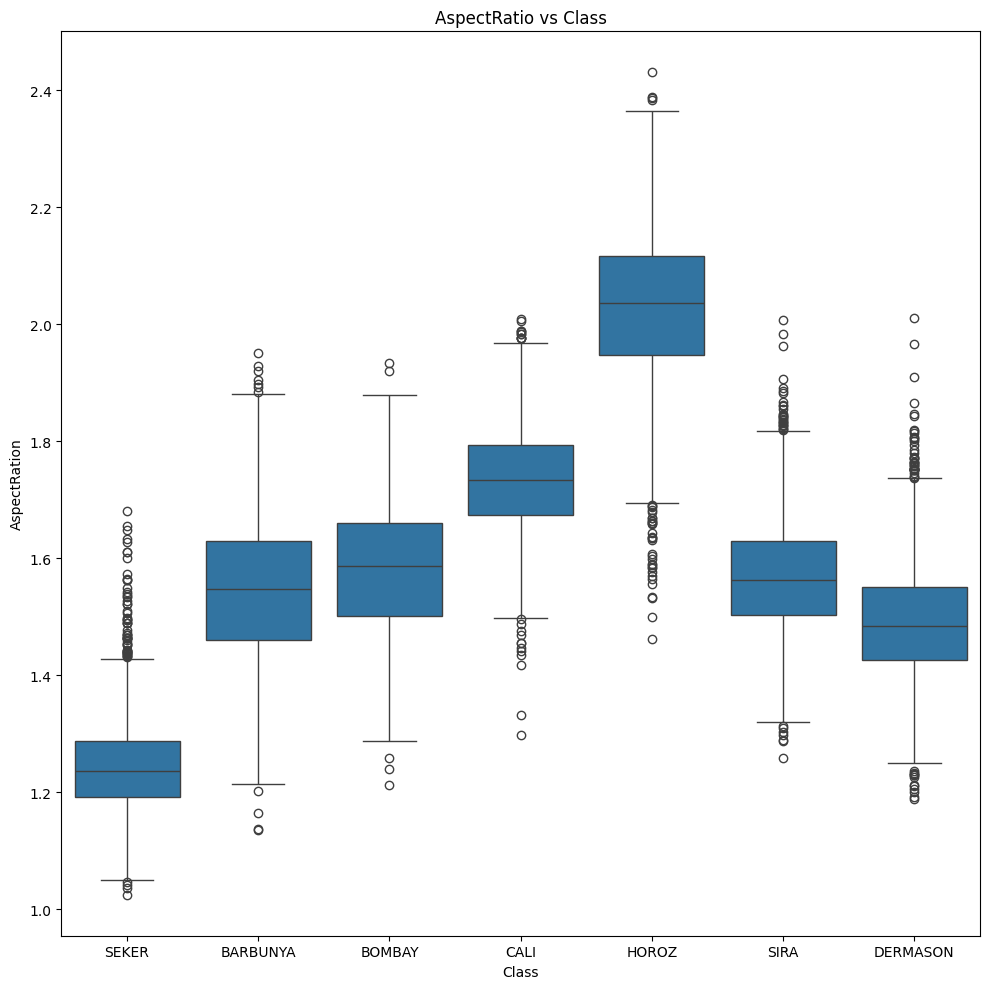

In [ ]:
# Box plot for each feature
import seaborn as sns
plt.figure(figsize=(10,10))

sns.boxplot(x='Class', y=df.AspectRation, data=df)
plt.title('AspectRatio vs Class')
plt.tight_layout()
plt.show()


<ipython-input-9-57e94b8229e9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='MinorAxisLength', y='Class', inner='box', palette='Dark2')


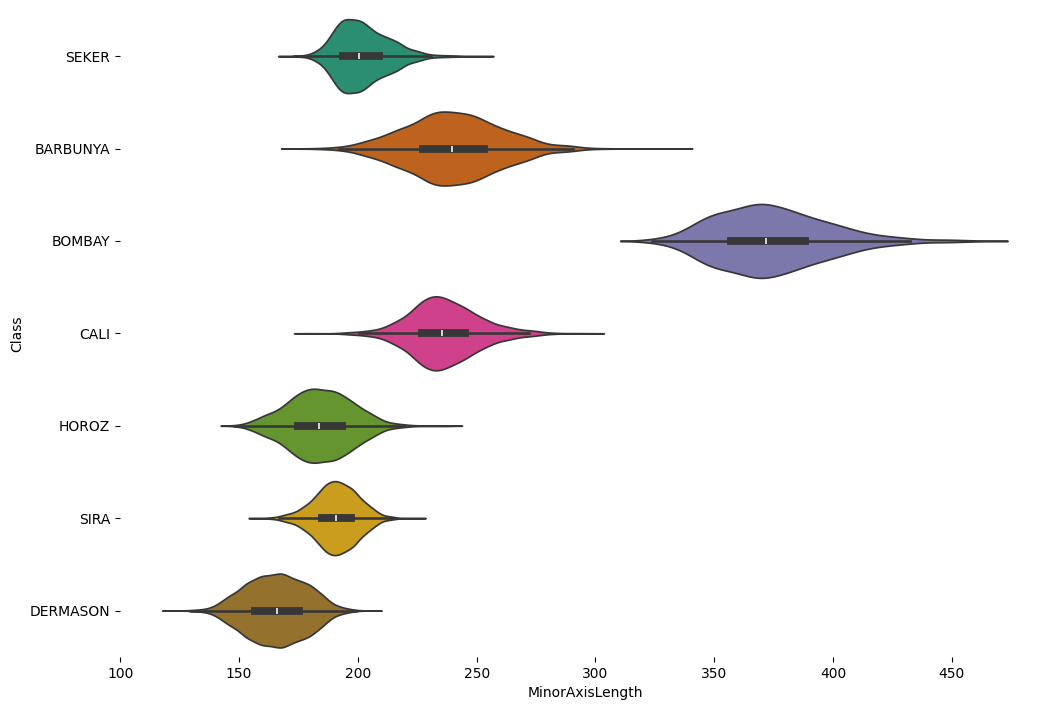

In [ ]:
# @title Class vs MinorAxisLength

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='MinorAxisLength', y='Class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

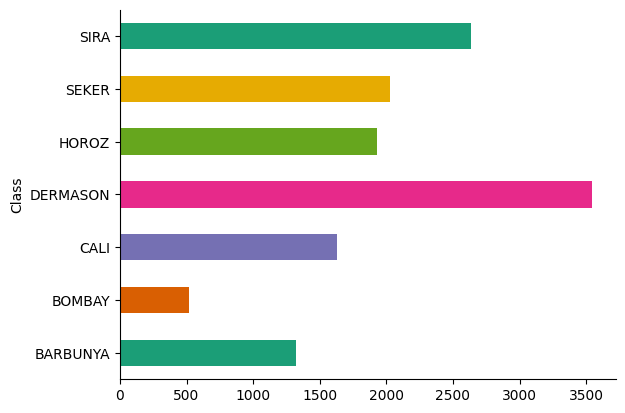

In [ ]:
# @title Class

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## KNN

In [ ]:
# preprocessing the data for KNN
gf=df[df.isnull().any(axis=1)] # to find rows with null values
gf.count()
df=df.dropna()  # dropping the rows with null values

# detecting and handling the duplicates
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]
df= df.drop_duplicates()

In [ ]:
# taking the class column out
X=df.drop("Class",axis=1)
Y=df.Class
# X,Y
from sklearn.decomposition import PCA #import pPCA class
scaler = StandardScaler() # create standard scaler object
X_scaled = scaler.fit_transform(X) # scale the data

pca = PCA(n_components=2) # create PCA object into 2 components
X_scaled = pca.fit_transform(X_scaled) # tr

Splitting Data into Training and Testing Datasets

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=10)
# X_train,X_test,y_train,y_test

KNN classifier Implementation

In [ ]:
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn5 = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
# Fitting and Predictions for the KNN Classifiers
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn7.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

Cross Validation score comparison when k value is 5 and 7

In [ ]:
# Assuming X_train and y_train are your feature matrix and target vector respectively
# Create a K-nearest neighbors classifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)  # Example with k=5

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
from sklearn.model_selection import cross_val_score

# Calculate the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score when k is 5:", mean_cv_score)

Cross-validation scores: [0.85311778 0.85951941 0.86367837 0.85628466 0.8461183 ]
Mean cross-validation score when k is 5: 0.855743704456293


In [ ]:
# Assuming X_train and y_train are your feature matrix and target vector respectively
# Create a K-nearest neighbors classifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=7)  # Example with k=5

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
from sklearn.model_selection import cross_val_score

# Calculate the mean cross-validation score
mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score when k is 7:", mean_cv_score)

Cross-validation scores: [0.85510996 0.86804657 0.86481242 0.86093144 0.85834411 0.85122898
 0.84271845]
Mean cross-validation score when k is 7: 0.8573131323643136


Predict Accuracy for both k values

In [ ]:
y_pred_5 = knn5.predict(X_test)
y_pred_7 = knn7.predict(X_test)
print(y_pred_5)
print(y_pred_7)

['SIRA' 'SEKER' 'BARBUNYA' ... 'DERMASON' 'HOROZ' 'SEKER']
['SIRA' 'SEKER' 'BARBUNYA' ... 'DERMASON' 'HOROZ' 'SEKER']


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=7", accuracy_score(y_test, y_pred_7)*100)

Accuracy with k=5 85.92017738359202
Accuracy with k=7 86.54841093865484


Performance Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_5)

recall = recall_score(y_test, y_pred_5, average='weighted')
precision = precision_score(y_test, y_pred_5, average='weighted')
f1 = f1_score(y_test, y_pred_5, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_5)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision score: ", precision)

print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8592017738359202
Precision score:  0.8581702817655035
Recall: 0.8592017738359202
F1 Score: 0.8584643628350213
Confusion Matrix:
 [[135   0  81   0   3   4   8]
 [  0 121   0   0   0   0   0]
 [ 81   0 234   0   3   3   2]
 [  0   0   0 661   2   6  41]
 [  1   0   7   6 347   0  14]
 [  2   0   0   7   1 392  11]
 [  5   0   0  70  14   9 435]]


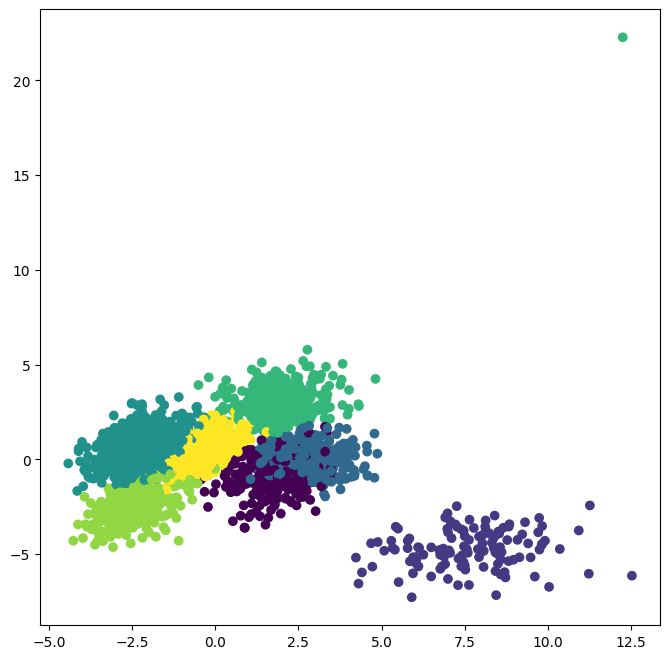

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the y_train array
y_pred_5 = label_encoder.fit_transform(y_pred_5)

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(X_test[:,0],X_test[:,1],c=y_pred_5)
plt.show()

## Decision Trees

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import confusion_table
from ISLP.models import ModelSpec as MS

In [ ]:
from sklearn.tree import (DecisionTreeClassifier as DTC, # classifier class for Decision Tree
                          DecisionTreeRegressor as DTR,  # Regressor class for Decsision Tree
                          BaseDecisionTree as BDT, # Base Decision Tree
                          plot_tree, # plotting the tree
                          export_text) # exporting tree as text

from sklearn.ensemble import (RandomForestClassifier as RFC, # classifier class for Random Forest
                              RandomForestRegressor as RFR, # Regressor class for Random Forest
                              GradientBoostingClassifier as GBC, # classifier class for Boosting
                              GradientBoostingRegressor as GBR) # Regressor class for Boosting

from sklearn.metrics import (accuracy_score, # getting accuracy score
                             log_loss) # logging loss

import pandas as pd
drybean = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [ ]:
# Remove rows with null values in any feature
drybean_cleaned = drybean.dropna()

drybean = drybean_cleaned

In [ ]:
data_model = MS(drybean.columns.drop('Class'), intercept=False) # DT don't need intercept
D = data_model.fit_transform(drybean) #
feature_names = list(D.columns) # create features names from the data columns
X = np.asarray(D) # convert the data into an array
# X

In [ ]:
high = np.asarray(drybean['Class'])
high = high.astype(str)
high

array(['SEKER', 'SEKER', 'SEKER', ..., 'DERMASON', 'DERMASON', 'DERMASON'],
      dtype='<U8')

In [ ]:
clf = DTC(criterion='entropy', # criterion to measure the loss of internal nodes
          max_depth=3, # how deep the tree should go, to check overfitting
          random_state=0)
clf.fit(X, high) # train the decision tree model


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
predictions = clf.predict(X) # test the model
predictions

array(['DERMASON', 'DERMASON', 'DERMASON', ..., 'SIRA', 'SIRA',
       'DERMASON'], dtype='<U8')

In [ ]:
accuracy_score(high, predictions) # calculate accuracy by comparing with the true values

0.8058845163663112

In [ ]:
resid_dev = np.sum(log_loss(high, clf.predict_proba(X)))
resid_dev

0.48512357370939196

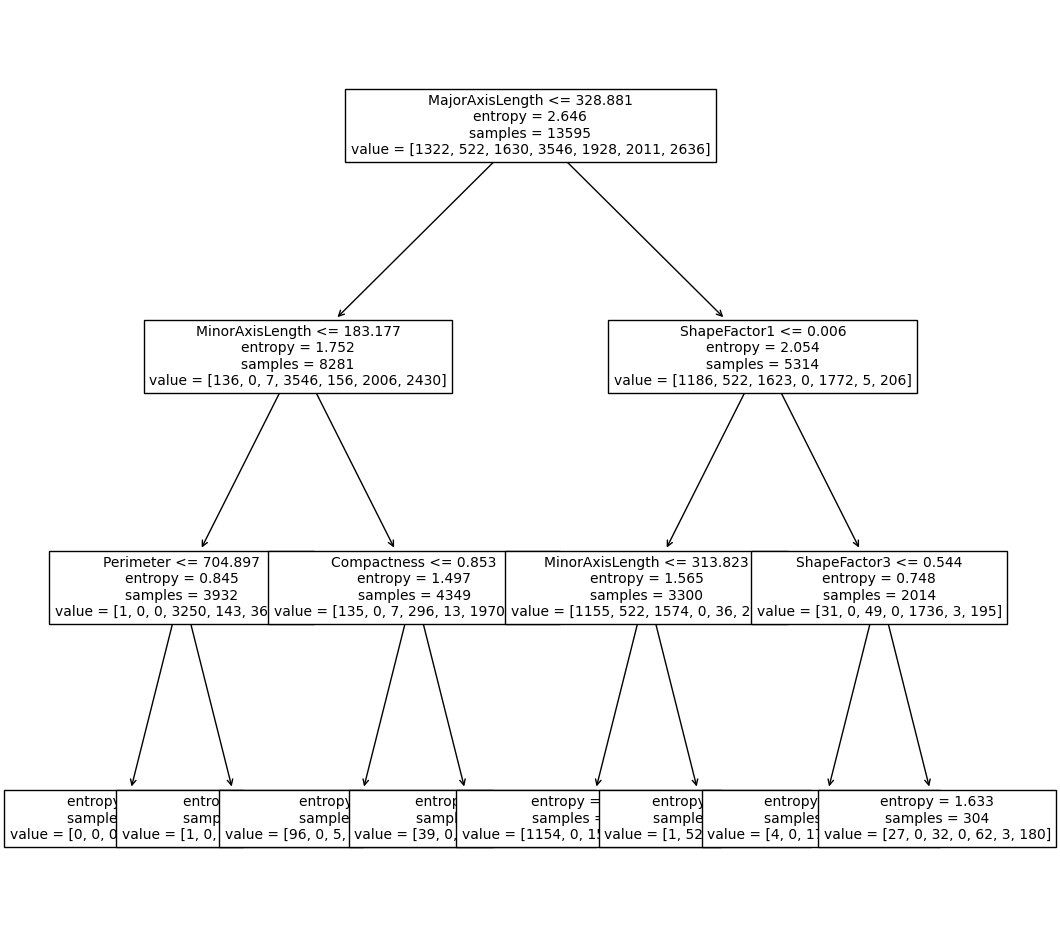

In [ ]:
ax = subplots(figsize=(12,12))[1]

plot_tree(clf, # trained model
          feature_names=feature_names, # feature names/predictors
          ax=ax,
          fontsize=10);

In [ ]:
print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))

|--- MajorAxisLength <= 328.88
|   |--- MinorAxisLength <= 183.18
|   |   |--- Perimeter <= 704.90
|   |   |   |--- weights: [0.00, 0.00, 0.00, 2677.00, 5.00, 33.00, 34.00] class: DERMASON
|   |   |--- Perimeter >  704.90
|   |   |   |--- weights: [1.00, 0.00, 0.00, 573.00, 138.00, 3.00, 468.00] class: DERMASON
|   |--- MinorAxisLength >  183.18
|   |   |--- Compactness <= 0.85
|   |   |   |--- weights: [96.00, 0.00, 5.00, 237.00, 13.00, 117.00, 1903.00] class: SIRA
|   |   |--- Compactness >  0.85
|   |   |   |--- weights: [39.00, 0.00, 2.00, 59.00, 0.00, 1853.00, 25.00] class: SEKER
|--- MajorAxisLength >  328.88
|   |--- ShapeFactor1 <= 0.01
|   |   |--- MinorAxisLength <= 313.82
|   |   |   |--- weights: [1154.00, 0.00, 1574.00, 0.00, 36.00, 2.00, 11.00] class: CALI
|   |   |--- MinorAxisLength >  313.82
|   |   |   |--- weights: [1.00, 522.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: BOMBAY
|   |--- ShapeFactor1 >  0.01
|   |   |--- ShapeFactor3 <= 0.54
|   |   |   |--- weights: [4.00

In [ ]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=200,
                              random_state=0)
results = skm.cross_validate(clf,
                             D,
                             high,
                             cv=validation)
results['test_score']

array([0.79])

In [ ]:
(X_train, X_test, High_train, High_test) = skm.train_test_split(X,
                                   high,
                                   test_size=0.5,
                                   random_state=0)


In [ ]:
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train, High_train)
accuracy_score(High_test, clf.predict(X_test))


0.8920270667843483

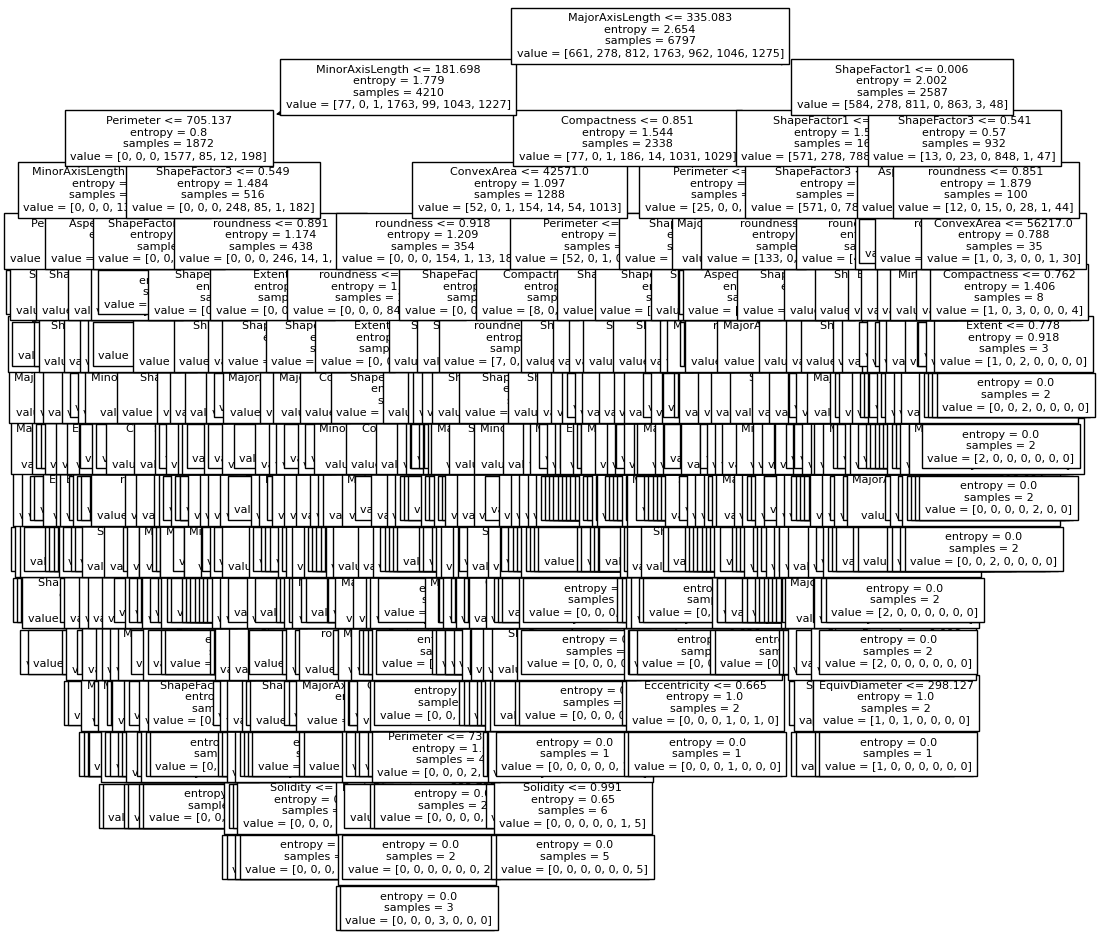

In [ ]:
ax = subplots(figsize=(12,12))[1]

plot_tree(clf, # trained model
          feature_names=feature_names, # feature names/predictors
          ax=ax,
          fontsize=8);

In [ ]:
ccp_path = clf.cost_complexity_pruning_path(X_train, High_train)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)


In [ ]:
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')

grid.fit(X_train, High_train)
grid.best_score_ # this is the score for the best alpha value


0.9108470501602703

In [ ]:
grid.best_estimator_ # print the best subtree

DecisionTreeClassifier(ccp_alpha=0.0011922814567673764, criterion='entropy',
                       random_state=0)

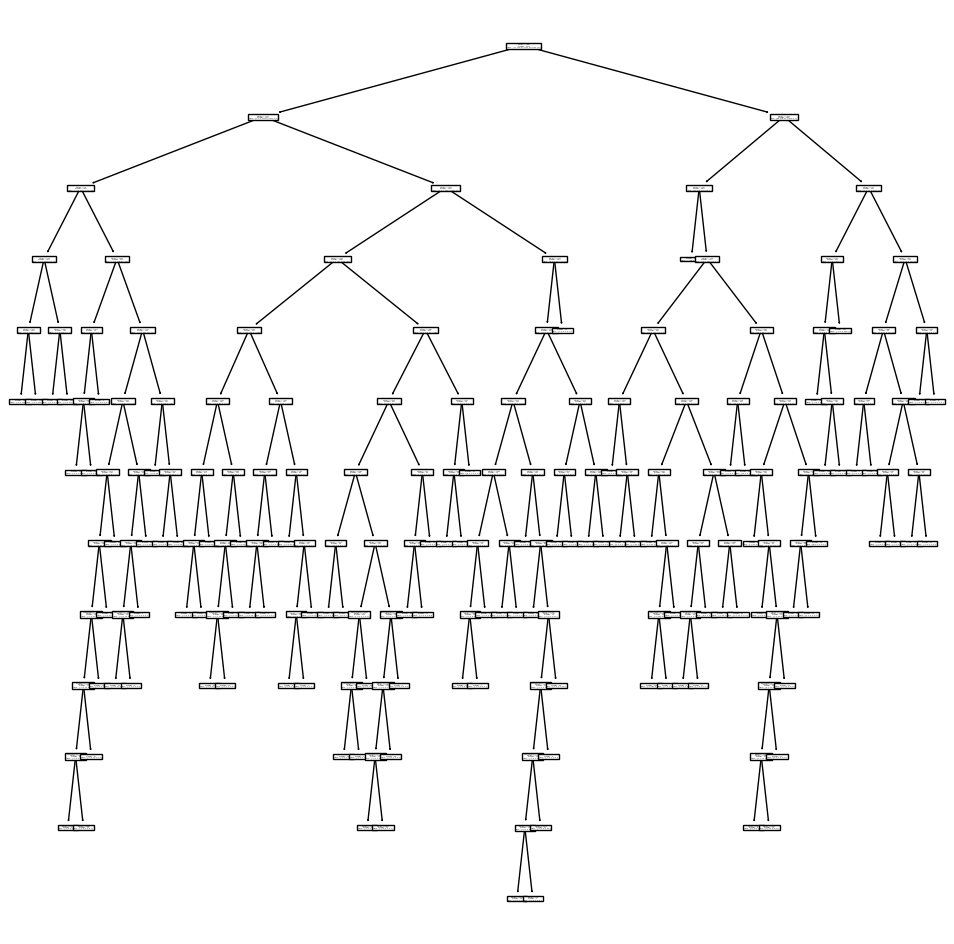

In [ ]:
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax);


In [ ]:
best_.tree_.n_leaves


102

In [ ]:
print(accuracy_score(High_test,
                     best_.predict(X_test)))
confusion = confusion_table(best_.predict(X_test),
                            High_test)
confusion


0.9042365401588702


Truth,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
Predicted,,,,,,,
BARBUNYA,575,0,24,0,8,14,15
BOMBAY,1,244,0,0,0,0,0
CALI,60,0,765,0,21,0,7
DERMASON,1,0,0,1651,12,43,158
HOROZ,6,0,17,4,902,0,23
SEKER,8,0,4,25,0,881,29
SIRA,10,0,8,103,23,27,1129


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the High_train array
High_train_encoded = label_encoder.fit_transform(High_train)


In [ ]:
boost_model = GBR(n_estimators=1000,
                  learning_rate=0.01,
                  max_depth=1
                  )
# High_train
boost_model.fit(X_train, High_train_encoded)

GradientBoostingRegressor(learning_rate=0.01, max_depth=1, n_estimators=1000)

In [ ]:
# Get feature importances
feature_importances = boost_model.feature_importances_

# Create a dictionary mapping feature indices to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features based on their importances
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most important features and their importances
print("Top 10 most Important Features: ")
for feature, importance in sorted_features[:10]:
    print(f"Feature: {feature}, Importance: {importance}")

Top 10 most Important Features: 
Feature: MinorAxisLength, Importance: 0.44438337988213783
Feature: ConvexArea, Importance: 0.30254074035595213
Feature: Perimeter, Importance: 0.13296911143760706
Feature: ShapeFactor1, Importance: 0.07564011982372094
Feature: roundness, Importance: 0.015694422568180818
Feature: EquivDiameter, Importance: 0.006418290215410092
Feature: ShapeFactor3, Importance: 0.006108175426637775
Feature: Compactness, Importance: 0.0059797695355976585
Feature: Area, Importance: 0.003975663556968682
Feature: Solidity, Importance: 0.0035696171497558668


## KMeans

In [ ]:
dry_bean_data = pd.read_excel('Dry_Bean_Dataset.xlsx')
#Printing the data
# dry_bean_data.head()
dry_bean_data.fillna(0, inplace=True)

In [ ]:
X = dry_bean_data.drop('Class', axis=1)
y = dry_bean_data['Class']

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=51)
kmeans.fit(X)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


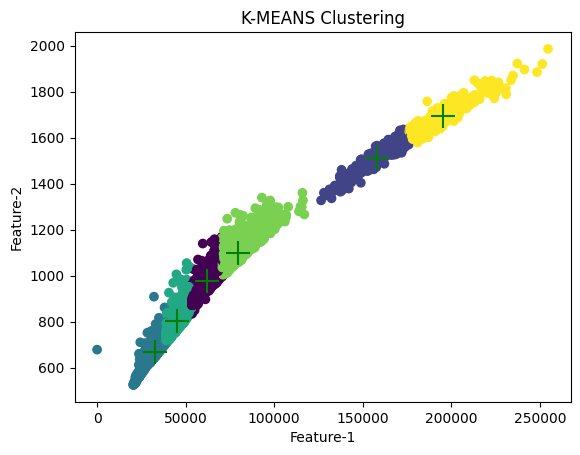

In [ ]:
dry_bean_data['Cluster'] = cluster_labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', s=300, c='green', label='Centroid')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('K-MEANS Clustering')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5367442763949458


## Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
path = "Dry_Bean_Dataset.xlsx" #saved the file in local

data = pd.read_excel(path) #using panda to read the excel file

print(data.head()) #printing few results

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [3]:
print(data.info()) # displays information about the dataset
#dataset has samples = 13611
#features = 17
#type of features = 14 - float, 2 - int, 1 - object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13609 non-null  float64
 4   AspectRation     13608 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13609 non-null  float64
 7   EquivDiameter    13610 non-null  float64
 8   Extent           13608 non-null  float64
 9   Solidity         13608 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13610 non-null  float64
 13  ShapeFactor2     13610 non-null  float64
 14  ShapeFactor3     13610 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
missing_values = data[data.isnull().any(axis=1)] #check for missing values
print(missing_values) #print the rows

      Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
12   31107    640.594       214.648549       184.969253           NaN   
19   31335    635.011       216.790092       184.163440      1.177161   
31   31823    662.532       222.872689       181.894696      1.225284   
47   32218    653.595       222.756071       184.404684      1.207974   
60   32514    649.012       221.445490       187.134423      1.183350   
70   32713    660.043       215.416321       193.486462      1.113341   
81   32885    659.728       227.067404              NaN      1.230320   
91   33019    655.703       224.450211       187.502627      1.197051   
121  33431    666.841       219.907408       193.680468           NaN   
131  33547    653.512       213.754071       199.925701      1.069168   
142  33731    671.696       231.172013       186.126456      1.242016   
158  33961    690.353       238.192499       181.654297      1.311241   
190  34291    671.507       230.658067             

In [5]:
median = data.median() #find the median of the values
data.fillna(median, inplace=True) #fill the null value with it

#print(data.head())
print(data.iloc[12]) #check for a empty row after filling

Area                    31107
Perimeter             640.594
MajorAxisLength    214.648549
MinorAxisLength    184.969253
AspectRation         1.551215
Eccentricity         0.507366
ConvexArea            31423.0
EquivDiameter      199.014227
Extent               0.761046
Solidity             0.989944
roundness            0.952582
Compactness          0.927163
ShapeFactor1           0.0069
ShapeFactor2         0.003145
ShapeFactor3         0.859632
ShapeFactor4         0.997564
Class                   SEKER
Name: 12, dtype: object


<ipython-input-5-406bb3eedaed>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = data.median() #find the median of the values


In [6]:
missing_values = data[data.isnull().any(axis=1)]
print(missing_values) #re-check the values again

Empty DataFrame
Columns: [Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4, Class]
Index: []


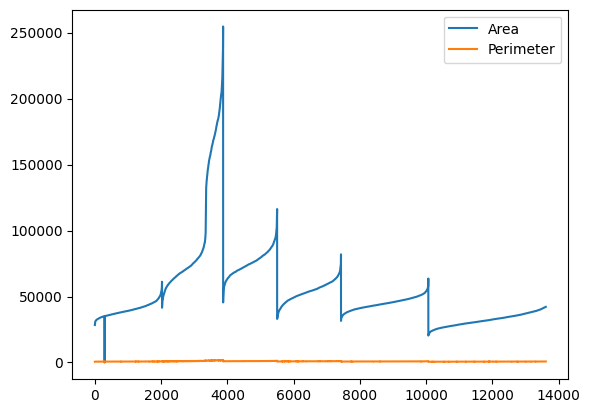

In [7]:
plt.plot(data['Area'], label='Area')
plt.plot(data['Perimeter'], label='Perimeter') #plot the area vs perimeter plot
plt.legend()
plt.show()

Text(0, 0.5, 'Perimeter')

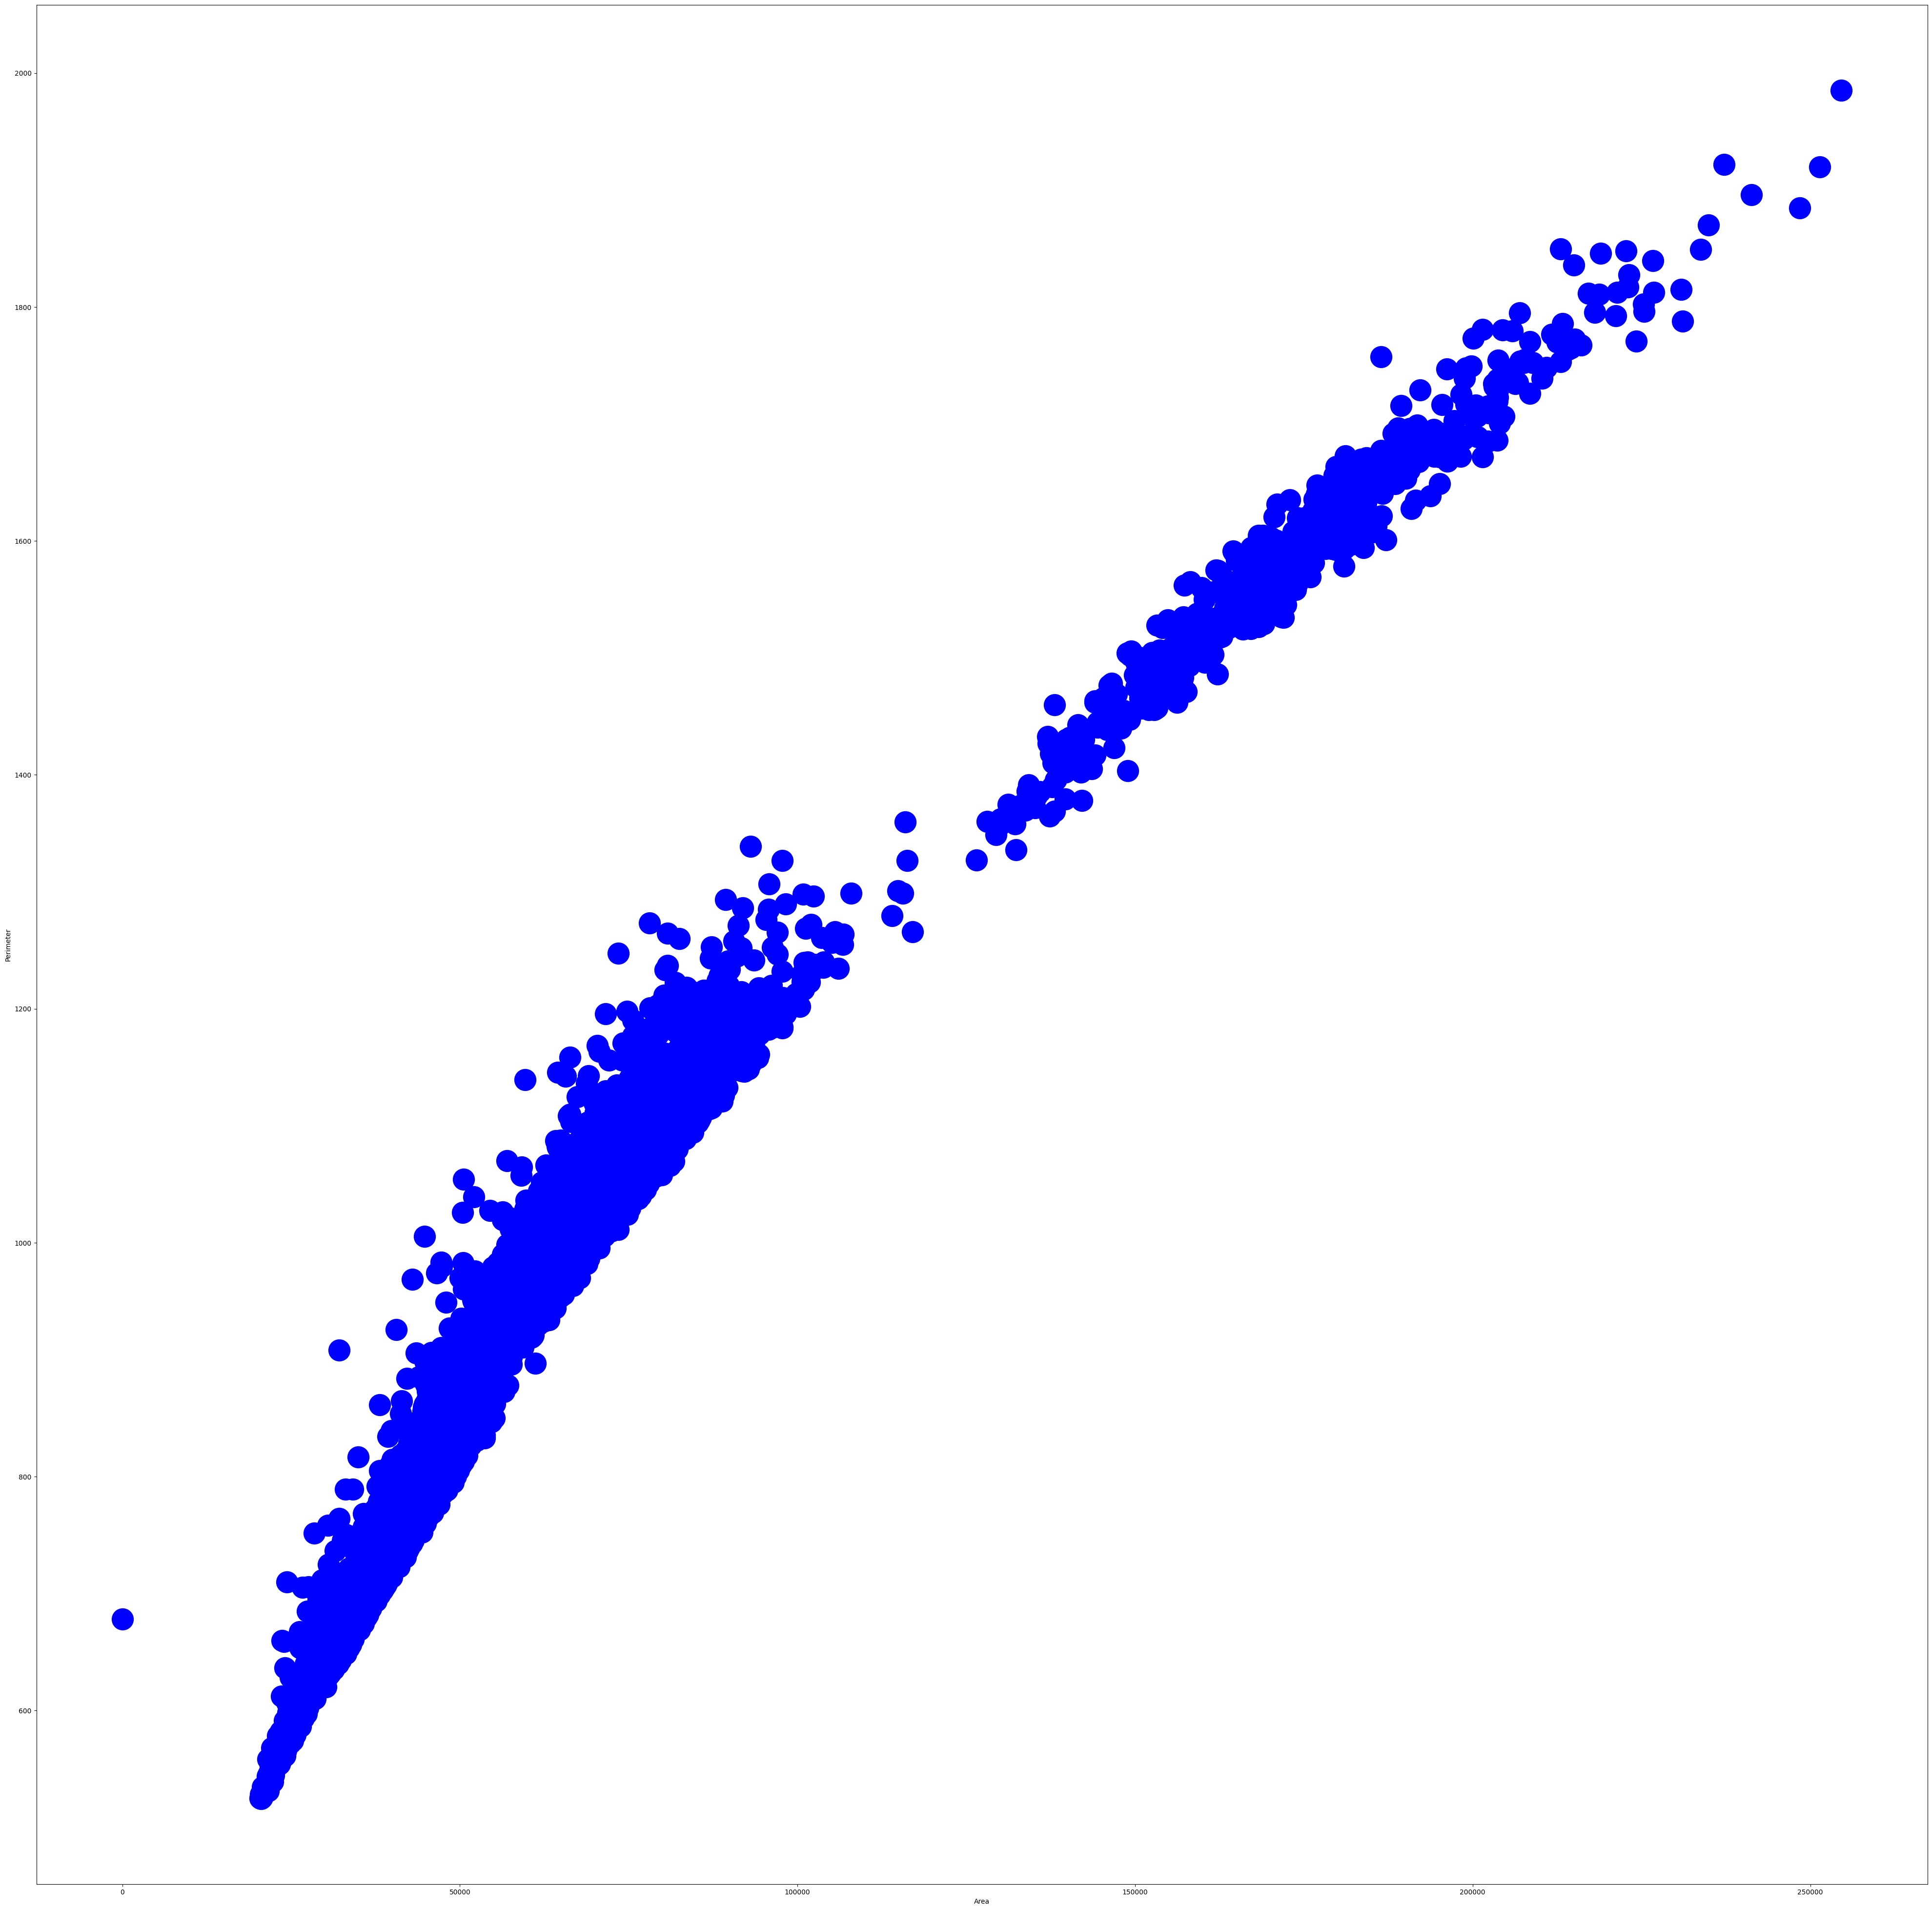

In [8]:
plt.figure(figsize=(50,50))
plt.scatter(data[["Area"]],data[["Perimeter"]],s=1000,c='blue') #plot the scatter plot
plt.xlabel("Area")
plt.ylabel("Perimeter")

In [10]:
#declare the predictors and variables
datasub = data.drop('Class', axis=1)
y = data.Class

In [11]:
#form the distance matrix

from scipy.spatial.distance import pdist

Data_dist = pdist(X=datasub, metric='Euclidean')
Data_dist.shape

(92622855,)

#Using complete method

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram

data_linkage_c = linkage(y=Data_dist, method='complete', optimal_ordering=False) #linkage matrix
data_linkage_c

array([[5.54700000e+03, 5.54800000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.50800000e+03, 5.50900000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.50400000e+03, 5.50500000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.72150000e+04, 2.72160000e+04, 1.54955336e+05, 1.30910000e+04],
       [2.72120000e+04, 2.72170000e+04, 1.86143910e+05, 5.20000000e+02],
       [2.72180000e+04, 2.72190000e+04, 3.43140813e+05, 1.36110000e+04]])

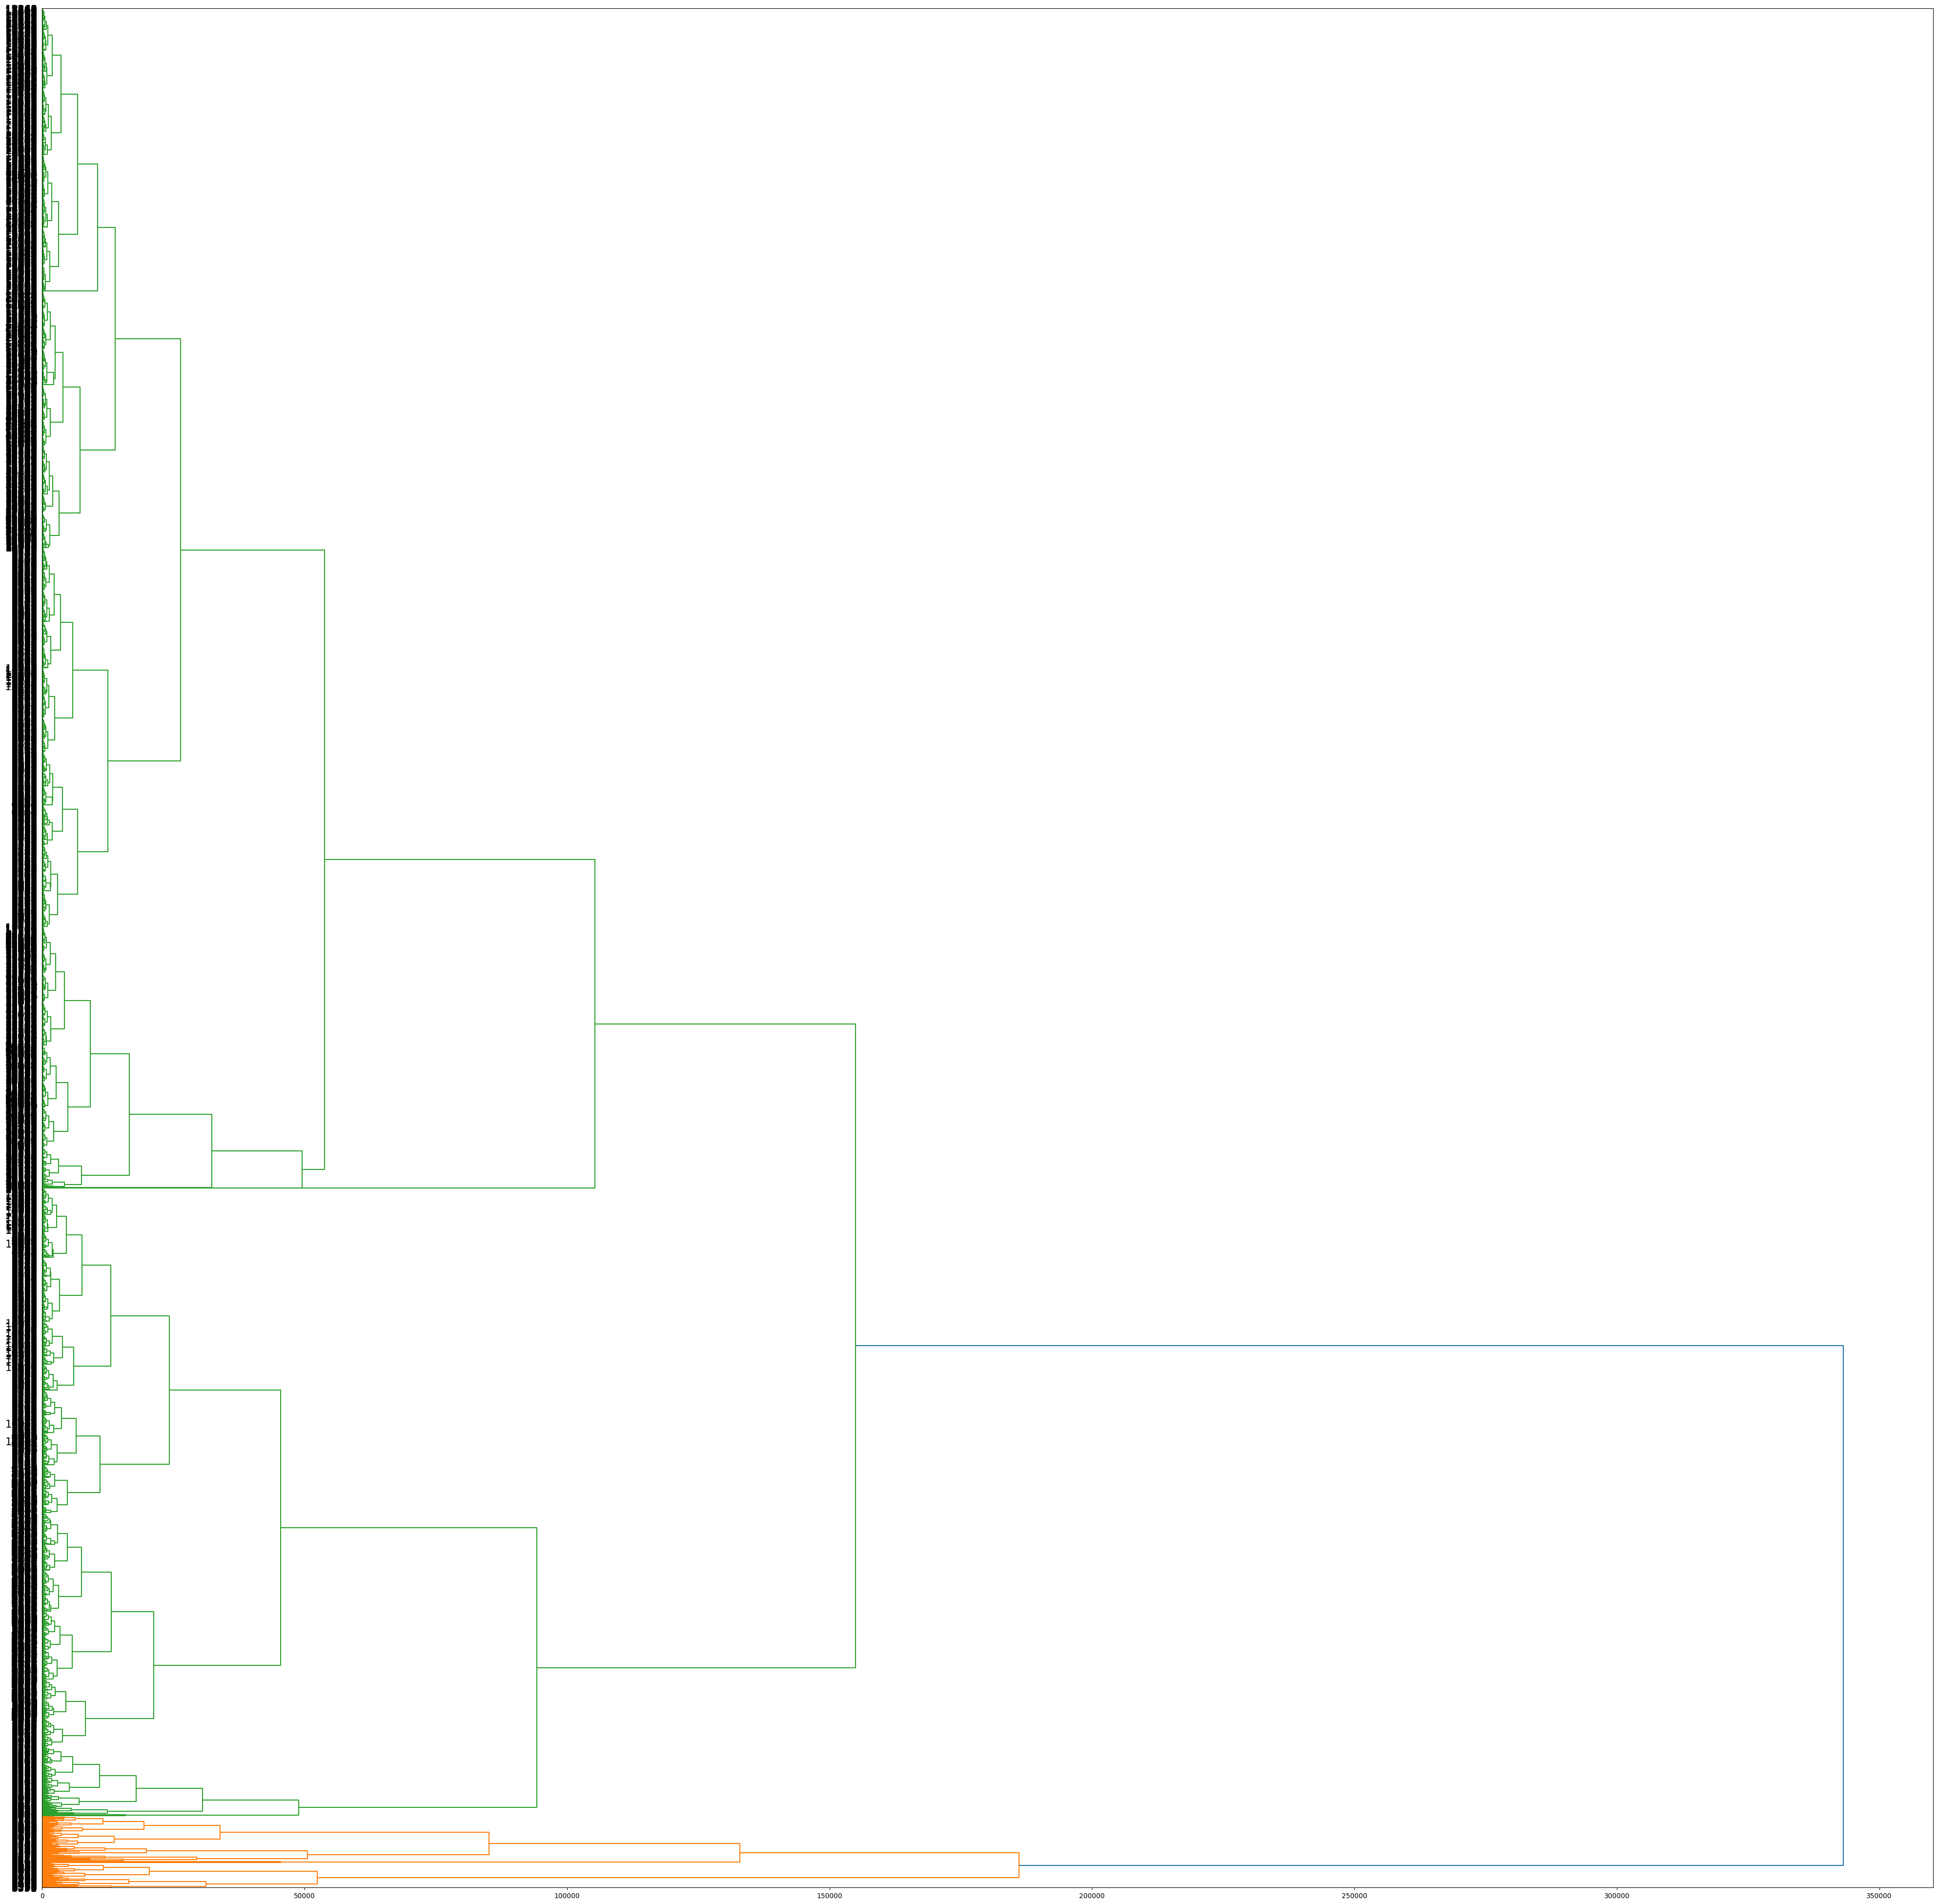

In [13]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(50,50))

dendrogram(Z=data_linkage_c,labels=datasub.index,count_sort=True,orientation = 'right', leaf_font_size=15) #plot the dendrogram
plt.show()

In [14]:
from scipy.cluster.hierarchy import fcluster

# Define the number of clusters you want
num_clusters = 5  # You can change this number as per your requirement

# Extract cluster labels
cluster_labels_c = fcluster(data_linkage_c, num_clusters, criterion='maxclust')

# Print cluster labels
print(cluster_labels_c)

[2 2 2 ... 2 2 2]


In [15]:
# Add cluster labels to the original dataset
datasub['cluster'] = cluster_labels_c

# Display the first few rows of the dataset with cluster labels
print(datasub.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.913358      0.007332      0.

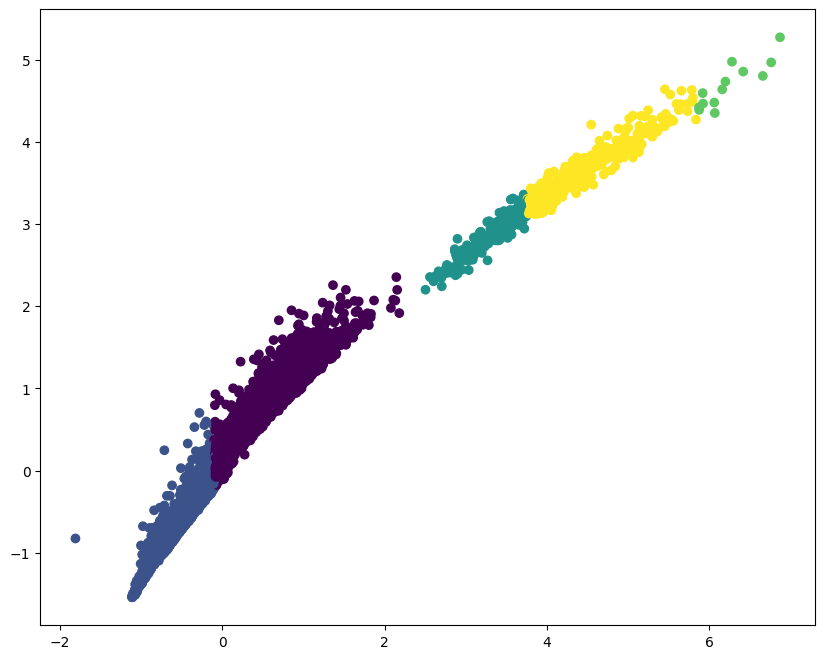

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #create standard scaler object
X_scaled = scaler.fit_transform(datasub.drop('cluster', axis=1))# Scale the data

# Reduce the dimensionality of the dataset using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

# Add cluster labels to the reduced dataset
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca['cluster'] = cluster_labels_c

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(X_scaled[:,0] , X_scaled[:,1] , c=cluster_labels_c)

In [17]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(datasub.drop('cluster', axis=1), cluster_labels_c) #find the accuracy of the model
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.6252888798187158


#Using Ward method

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram

data_linkage_w = linkage(y=Data_dist, method='ward', optimal_ordering=False)
data_linkage_w

array([[5.54700000e+03, 5.54800000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.55300000e+03, 5.55400000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.59800000e+03, 5.59900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.72120000e+04, 2.72150000e+04, 1.25783017e+06, 9.43100000e+03],
       [2.72170000e+04, 2.72180000e+04, 3.25777632e+06, 1.30910000e+04],
       [2.72160000e+04, 2.72190000e+04, 5.64892402e+06, 1.36110000e+04]])

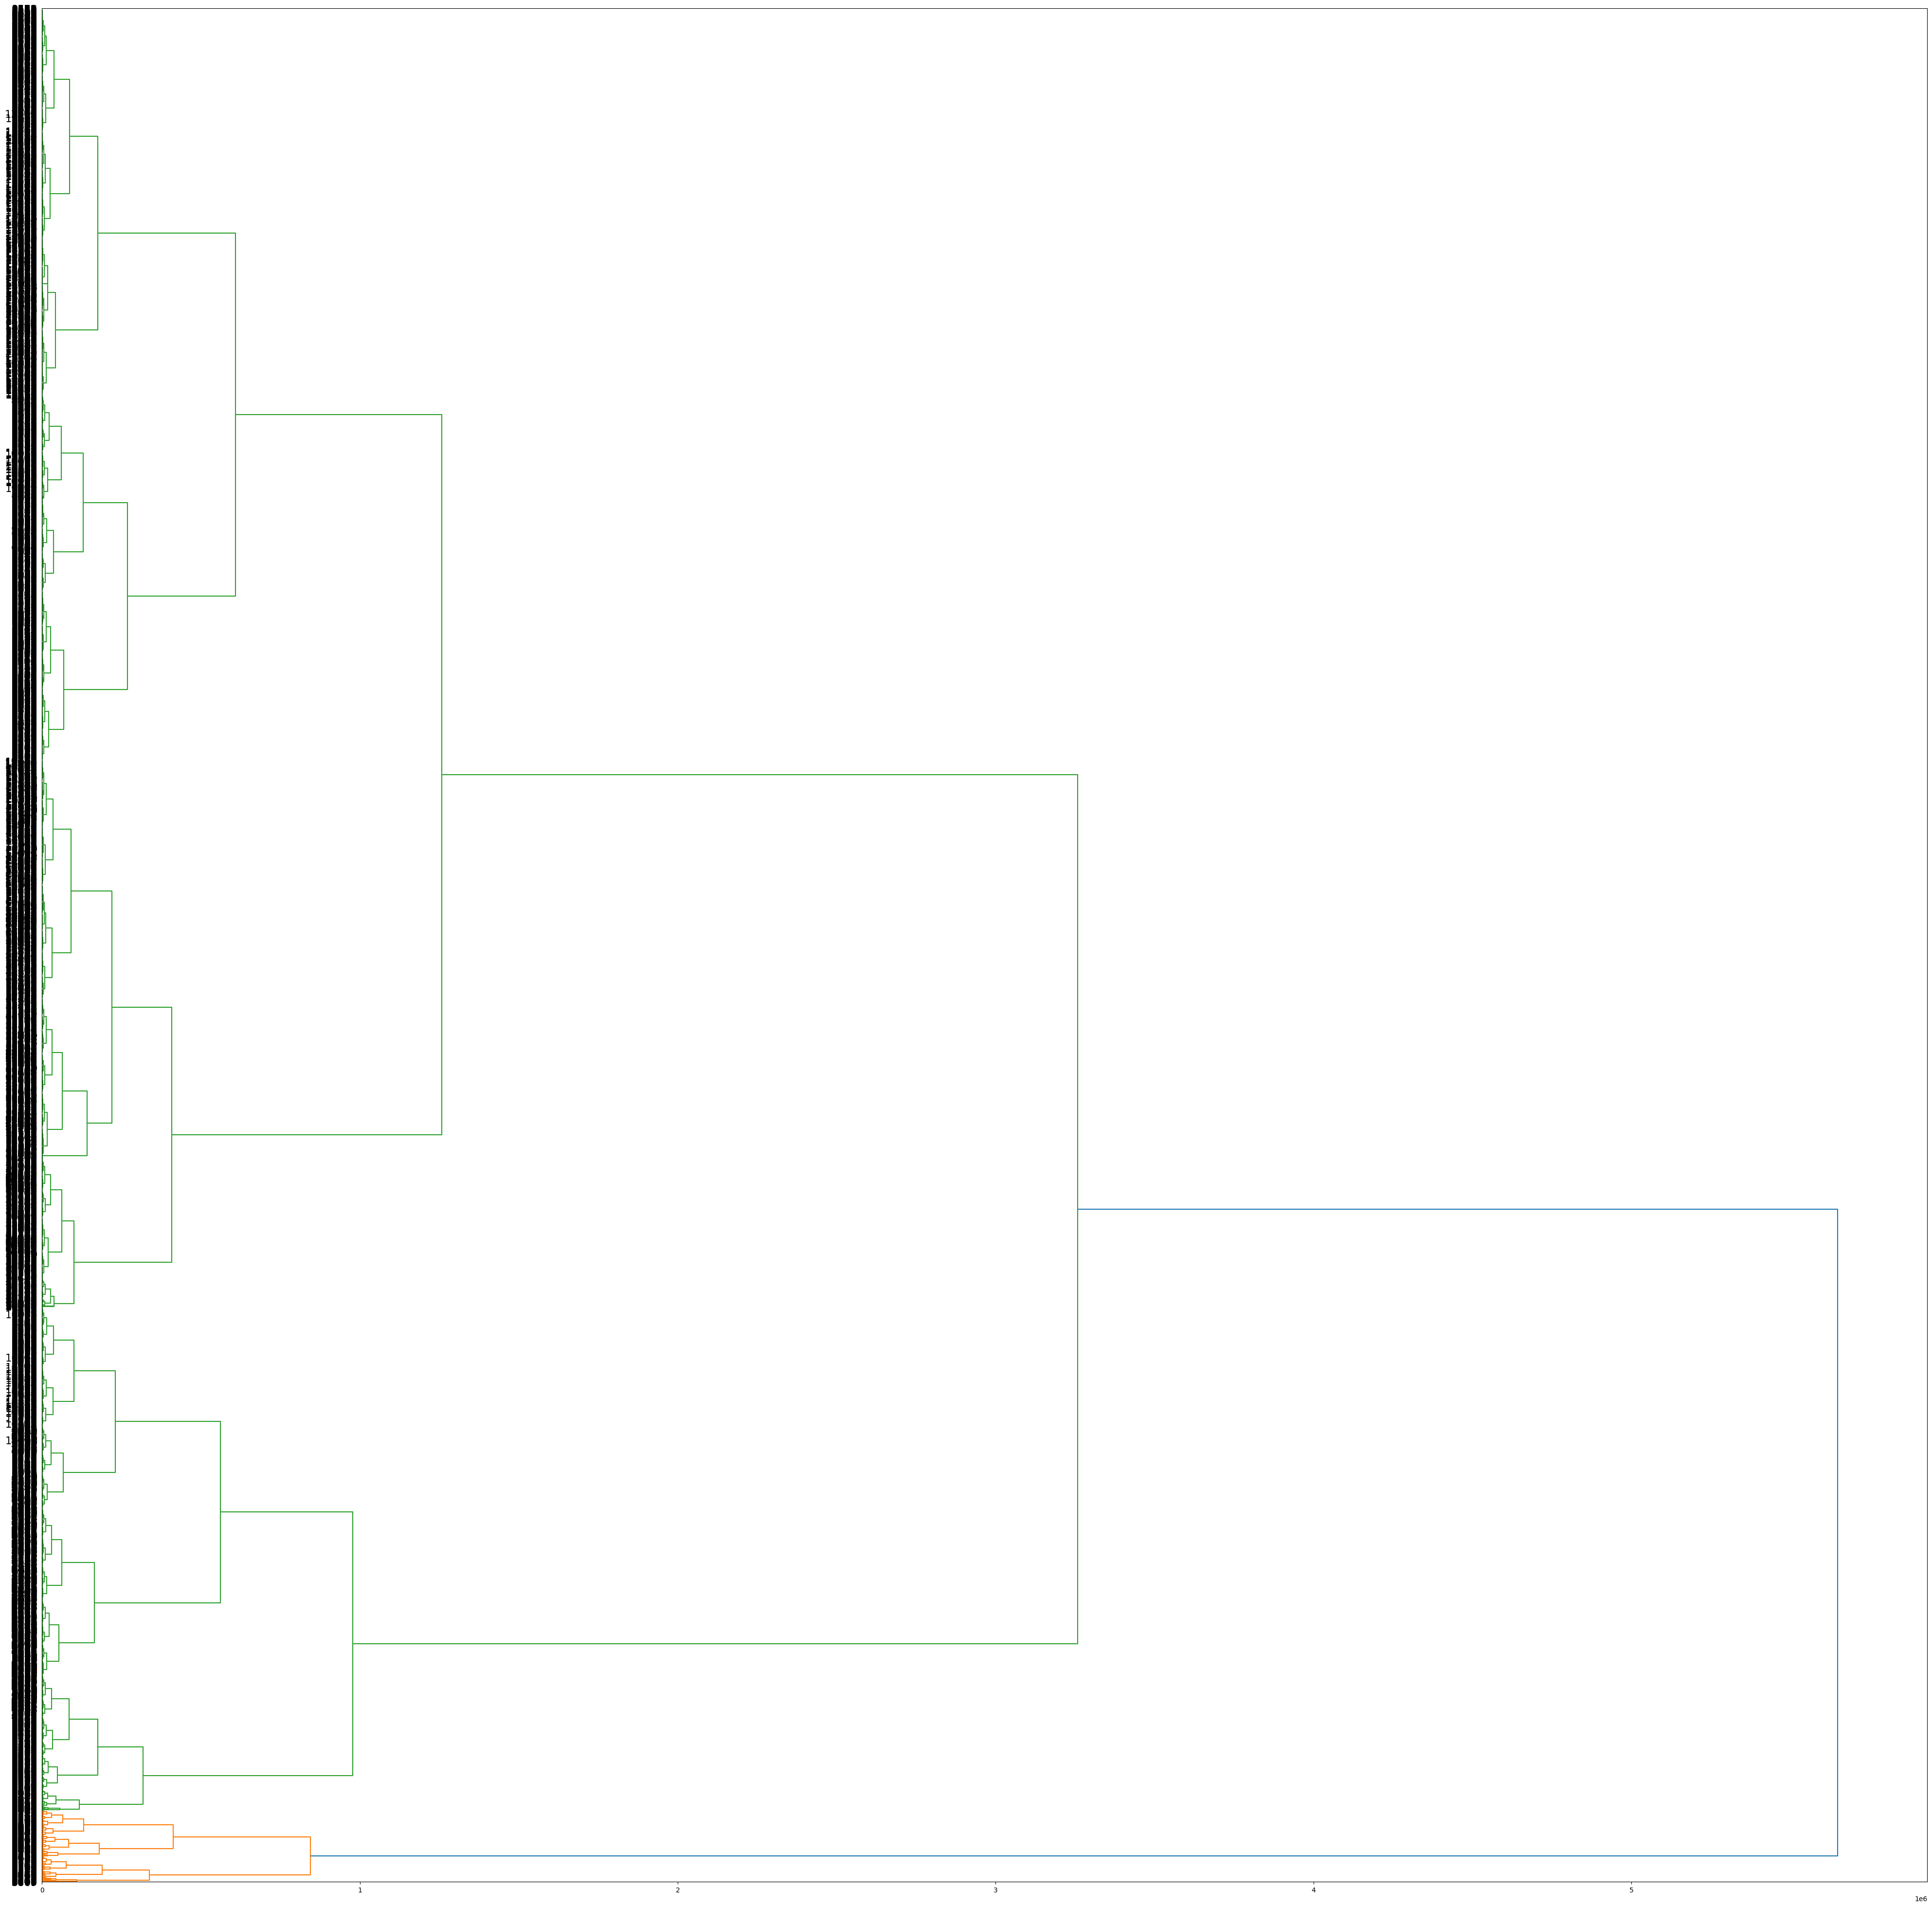

In [19]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(50,50))

dendrogram(Z=data_linkage_w,labels=datasub.index,count_sort=True,orientation = 'right', leaf_font_size=15)
plt.show()

In [20]:
from scipy.cluster.hierarchy import fcluster

# Define the number of clusters you want
num_clusters = 5  # You can change this number as per your requirement

# Extract cluster labels
cluster_labels_w = fcluster(data_linkage_w, num_clusters, criterion='maxclust')

# Print cluster labels
print(cluster_labels_w)

[4 4 4 ... 5 5 5]


In [21]:
# Add cluster labels to the original dataset
datasub['cluster'] = cluster_labels_w

# Display the first few rows of the dataset with cluster labels
print(datasub.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.913358      0.007332      0.

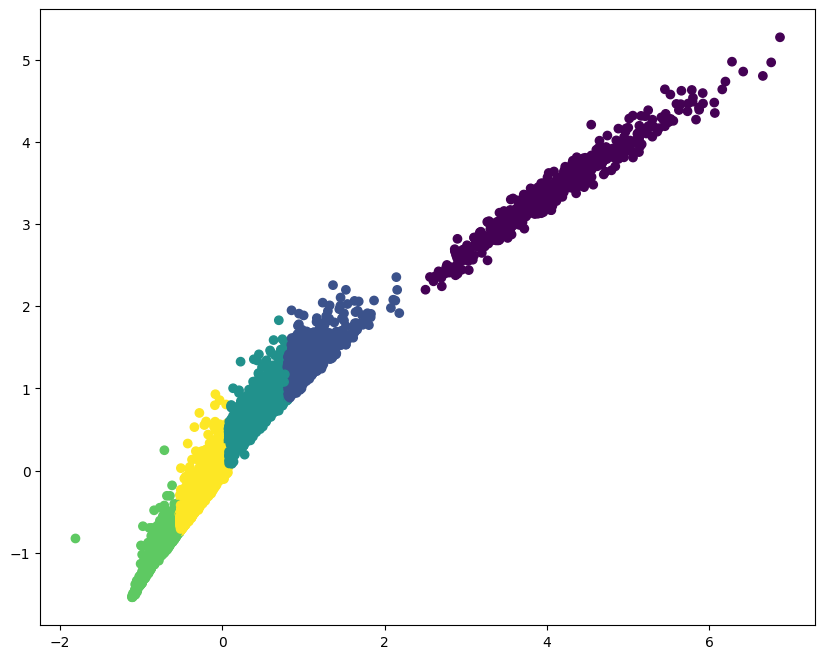

In [22]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #create standard scaler object
X_scaled = scaler.fit_transform(datasub.drop('cluster', axis=1))# Scale the data

# Reduce the dimensionality of the dataset using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

# Add cluster labels to the reduced dataset
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca['cluster'] = cluster_labels_w

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(X_scaled[:,0] , X_scaled[:,1] , c=cluster_labels_w)

In [23]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(datasub.drop('cluster', axis=1), cluster_labels_w)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.5312564884542805


#Using Average method

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram

data_linkage_s = linkage(y=Data_dist, method='average', optimal_ordering=False)
data_linkage_s

array([[5.50800000e+03, 5.50900000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.50400000e+03, 5.50500000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.54700000e+03, 5.54800000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.72130000e+04, 2.72150000e+04, 6.25836171e+04, 5.20000000e+02],
       [1.16000000e+02, 2.72170000e+04, 1.04368992e+05, 1.30910000e+04],
       [2.72180000e+04, 2.72190000e+04, 1.78614266e+05, 1.36110000e+04]])

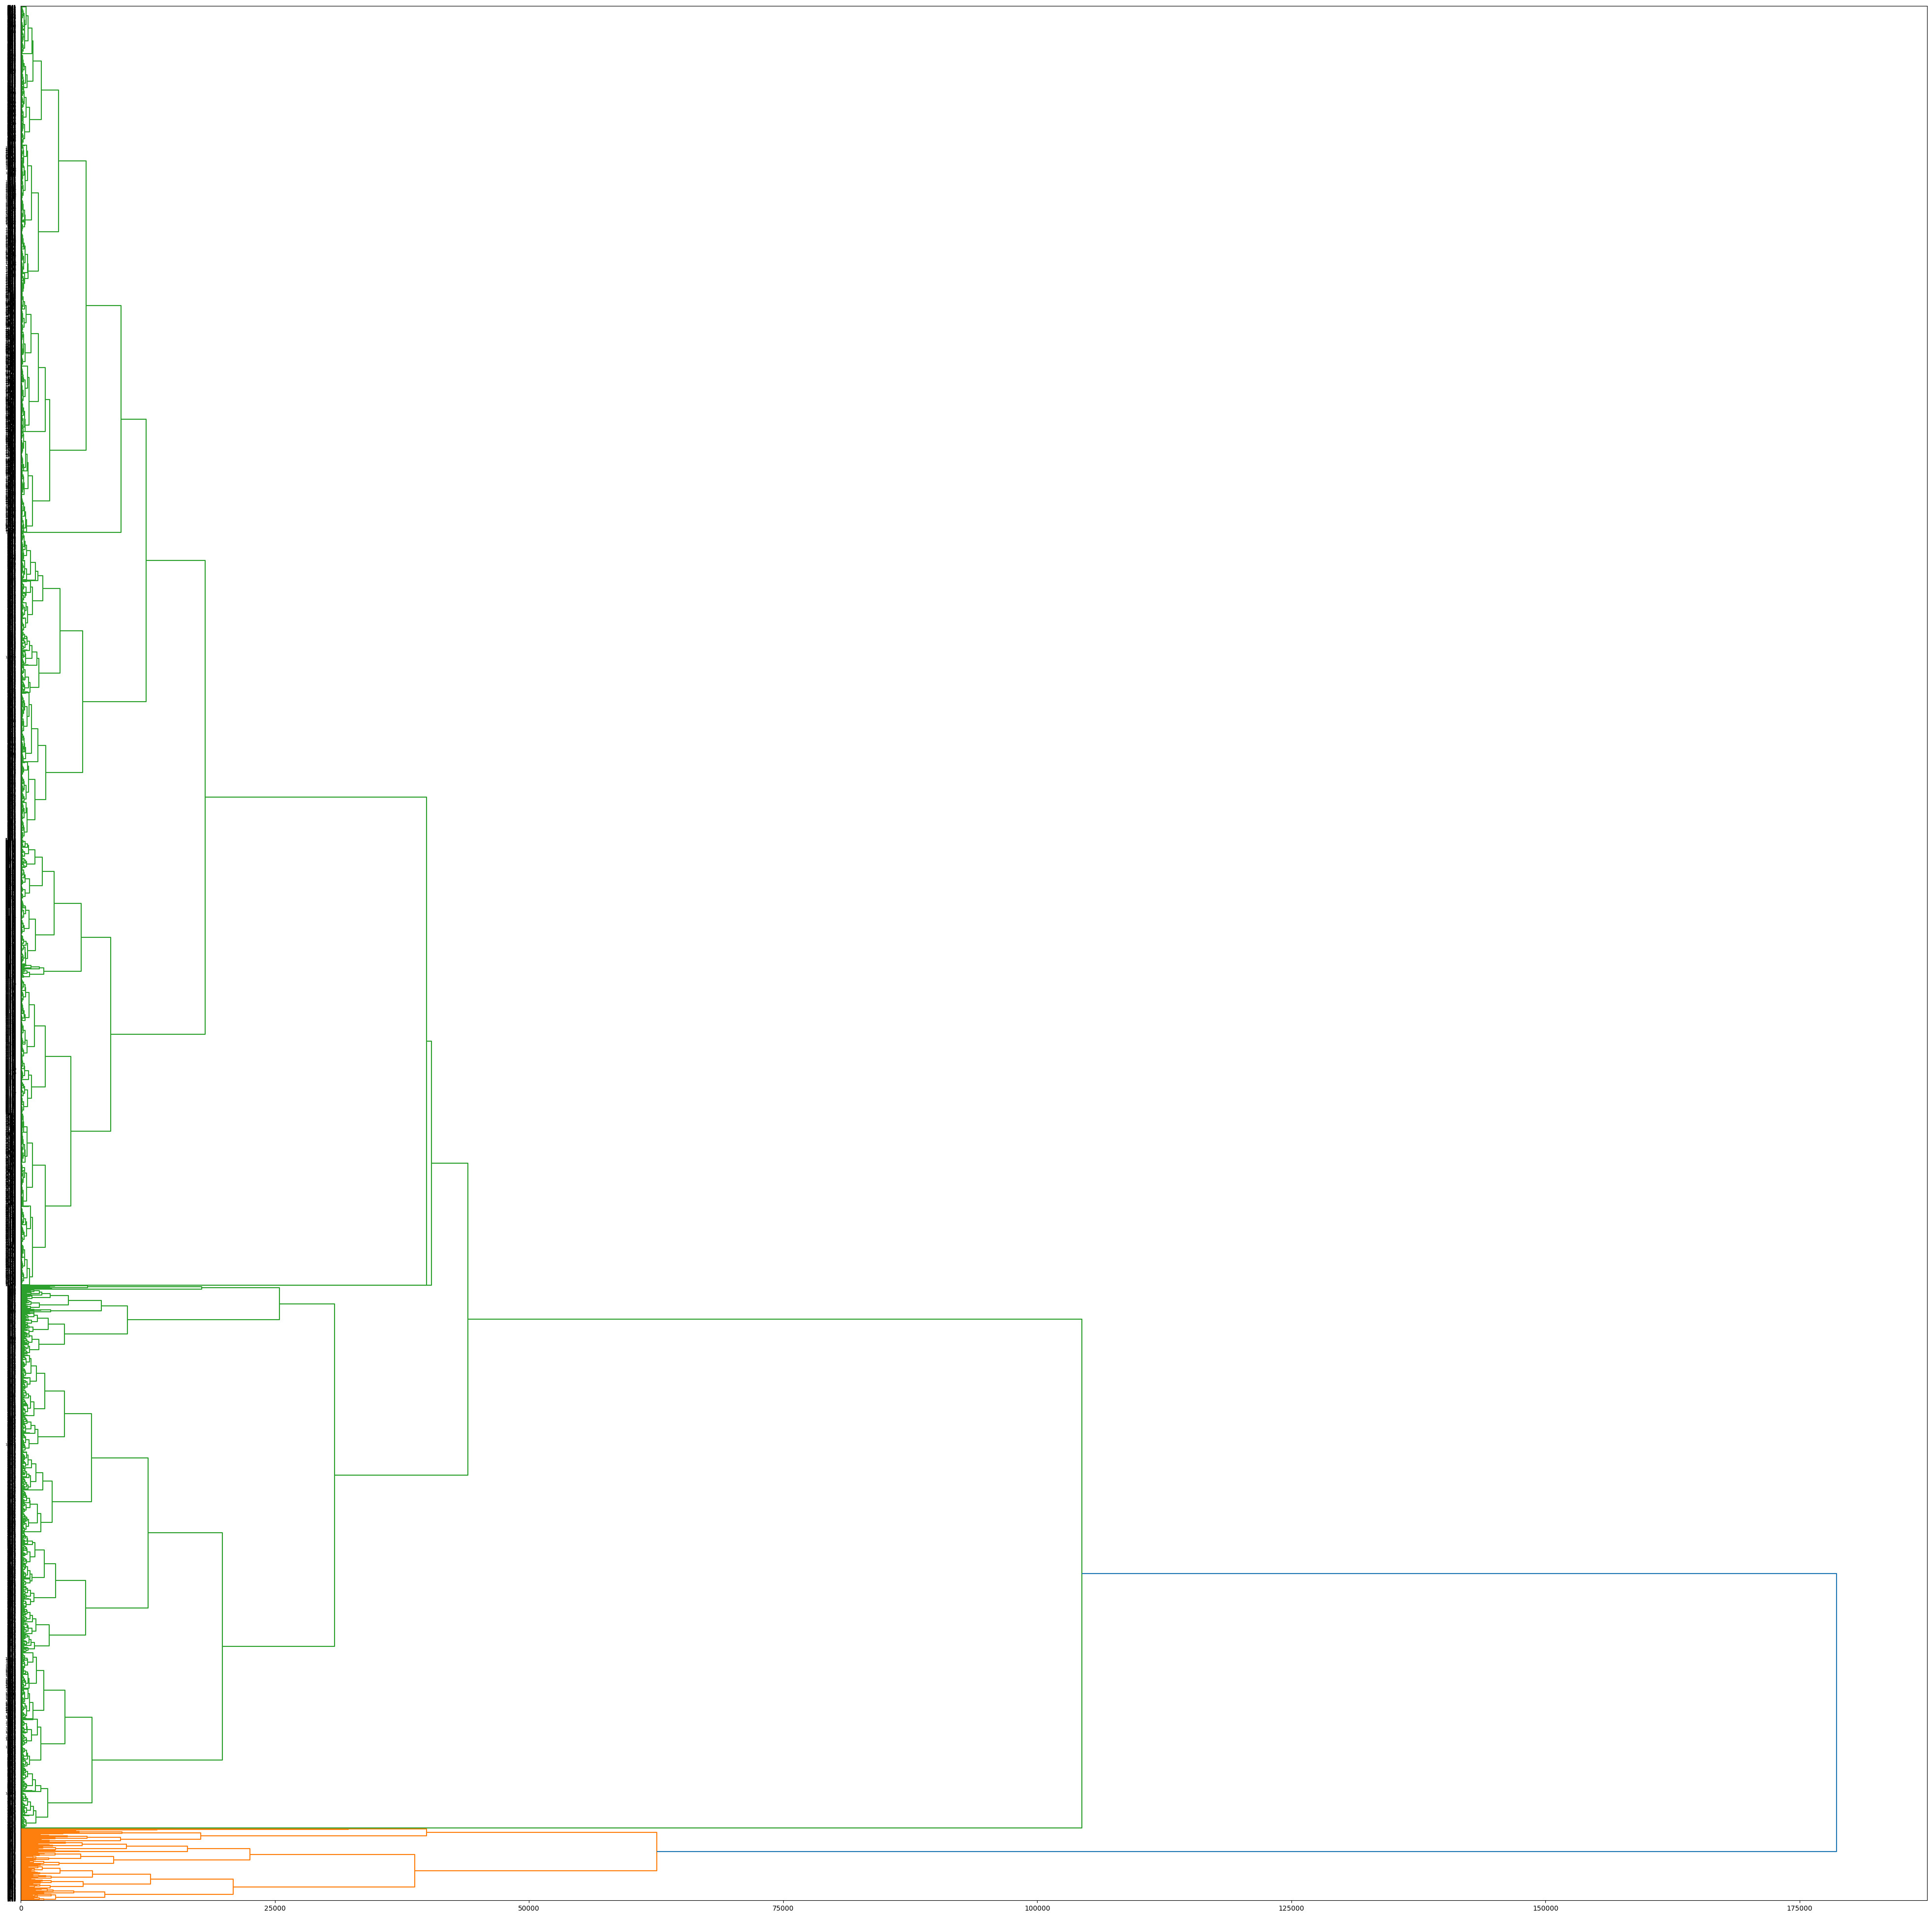

In [25]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(50,50))

dendrogram(Z=data_linkage_s,labels=datasub.index,orientation = 'right')
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster

# Define the number of clusters you want
num_clusters = 5  # You can change this number as per your requirement

# Extract cluster labels
cluster_labels_s = fcluster(data_linkage_s, num_clusters, criterion='maxclust')

# Print cluster labels
print(cluster_labels_s)

[4 4 4 ... 4 4 4]


In [27]:
# Add cluster labels to the original dataset
datasub['cluster'] = cluster_labels_s

# Display the first few rows of the dataset with cluster labels
print(datasub.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.913358      0.007332      0.

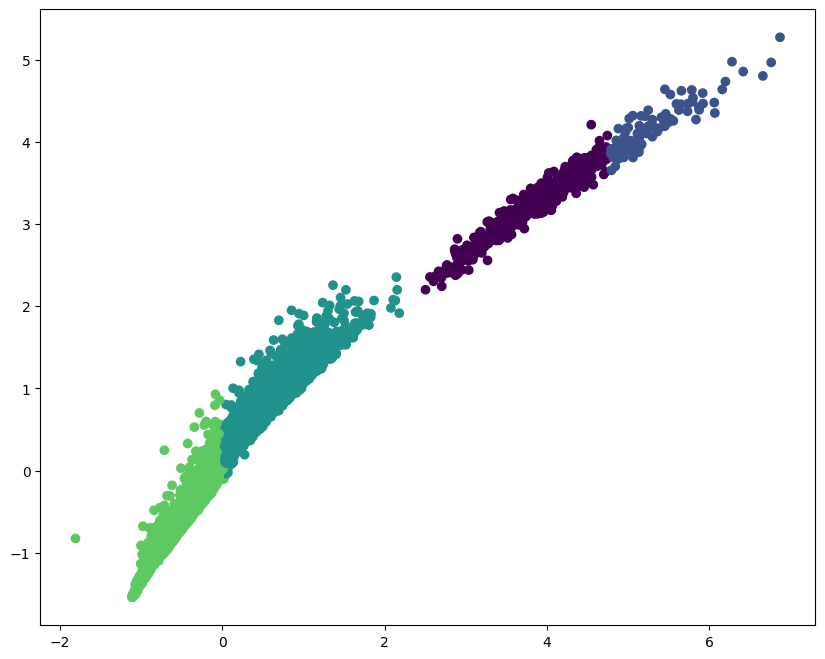

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #create standard scaler object
X_scaled = scaler.fit_transform(datasub.drop('cluster', axis=1))# Scale the data

# Reduce the dimensionality of the dataset using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

# Add cluster labels to the reduced dataset
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca['cluster'] = cluster_labels_s

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(X_scaled[:,0] , X_scaled[:,1] , c=cluster_labels_s)

In [29]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(datasub.drop('cluster', axis=1), cluster_labels_s)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.6530365189248228
